<a href="https://colab.research.google.com/github/mujeebla/Classroom/blob/main/fine_tuning_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download.git

Cloning into 'All-CSV-ML-Data-Files-Download'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 91 (delta 15), reused 56 (delta 11), pack-reused 28 (from 1)
Receiving objects: 100% (91/91), 111.38 MiB | 19.76 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (43/43), done.


In [4]:
!ls All-CSV-ML-Data-Files-Download

 amazon_product_details.csv	    nba.csv
 amazon_reviews_for_products.csv    netflix_titles.csv
 bigmac.csv			    pokemon.csv
 boston.csv			    quarters.csv
 chicago.csv			    quora_duplicate_questions.tsv
 Customer_Churn_Modelling.csv	    README.md
 data.csv			   'Restaurant - Customers.csv'
'Data - Multiple Worksheets.xlsx'  'Restaurant - Foods.csv'
'Data - Single Worksheet.xlsx'	   'Restaurant - Week 1 Sales.csv'
 ecommerce.csv			   'Restaurant - Week 1 Satisfaction.csv'
 employees.csv			   'Restaurant - Week 2 Sales.csv'
 fake_news.xlsx			    revenue.csv
 foods.csv			    salesmen.csv
 fortune1000.csv		    spam.tsv
 google_stock_price.csv		    stackoverflow.csv
 houseprice.csv			    titanic.csv
 IMDB-Dataset.csv		    twitter4000.csv
 IMDB-Movie-Data.csv		    twitter_disaster_tweets.csv
 jamesbond.csv			    twitter_multi_class_sentiment.csv
 mit_restaurant_search_ner	    twitter_sentiment.csv
 moviereviews.tsv		    worldstats.csv


In [5]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 96.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('All-CSV-ML-Data-Files-Download/twitter_multi_class_sentiment.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [9]:
df.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [10]:
df.label.value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


In [11]:
from transformers import AutoTokenizer

model_ckpt = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [12]:
text = "I love to play football"
encoded_text = tokenizer(text)

In [13]:
encoded_text

{'input_ids': [101, 1045, 2293, 2000, 2377, 2374, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [14]:
len(tokenizer.vocab), tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, stratify=df['label_name'])

test, validation = train_test_split(test, test_size=1/3, stratify=test['label_name'])

train.shape, validation.shape, test.shape

((11200, 3), (1600, 3), (3200, 3))

In [16]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    'train': Dataset.from_pandas(train, preserve_index=False),
    'validation': Dataset.from_pandas(validation, preserve_index=False),
    'test': Dataset.from_pandas(test, preserve_index=False)
})

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name'],
        num_rows: 11200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'label_name'],
        num_rows: 3200
    })
})

In [17]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)


emotion_encoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

In [18]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
})

In [19]:
label_id = df.groupby(['label_name','label']).size().index.values

label2id = {entry[0]:entry[1] for entry in label_id}
id2label = {entry[1]:entry[0] for entry in label_id}

label2id, id2label

({'anger': 3, 'fear': 4, 'joy': 1, 'love': 2, 'sadness': 0, 'surprise': 5},
 {3: 'anger', 4: 'fear', 1: 'joy', 2: 'love', 0: 'sadness', 5: 'surprise'})

In [20]:
from transformers import AutoModel
import torch

model_ckpt = 'bert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)
#

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [21]:
device

device(type='cuda')

In [23]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = 3
config = AutoConfig.from_pretrained(model_ckpt, id2label=id2label, label2id=label2id)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [38]:
from transformers import TrainingArguments

batch_size = 64
training_dir = 'bert_base_train_dir'
training_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy='epoch',
    disable_tqdm=False,
    logging_dir="./logs",
    logging_steps=10,
    log_level='info',
    report_to="none")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [27]:
!pip install evaluate
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.6 MB/s eta 0:00:00


In [29]:
import evaluate
import numpy as np

metric = evaluate.load('accuracy')

def compute_metrics_evaluate(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [30]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {
        'accuracy': acc,
        'f1': f1
    }



In [39]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics)

<ipython-input-39-c84aa7768591>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [40]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: label_name, text. If label_name, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 11,200
  Num Epochs = 2
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 350
  Number of trainable parameters = 109,486,854


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.193900,0.223751,0.918125,0.918323
2,0.135500,0.191063,0.928125,0.928876


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: label_name, text. If label_name, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 1600
  Batch size = 64
Saving model checkpoint to bert_base_train_dir/checkpoint-350
Configuration saved in bert_base_train_dir/checkpoint-350/config.json
Model weights saved in bert_base_train_dir/checkpoint-350/model.safetensors
tokenizer config file saved in bert_base_train_dir/checkpoint-350/tokenizer_config.json
Special tokens file saved in bert_base_train_dir/checkpoint-350/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: label_name, text. If label_name, text are not expected by `BertForSequenceClassification.forward`,  you can safely i

TrainOutput(global_step=350, training_loss=0.2212844719205584, metrics={'train_runtime': 342.7102, 'train_samples_per_second': 65.361, 'train_steps_per_second': 1.021, 'total_flos': 1001502421516800.0, 'train_loss': 0.2212844719205584, 'epoch': 2.0})

In [41]:
preds_output = trainer.predict(emotion_encoded['test'])
preds_output.metrics

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: label_name, text. If label_name, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.

***** Running Prediction *****
  Num examples = 3200
  Batch size = 64


{'test_loss': 0.18260310590267181,
 'test_accuracy': 0.9246875,
 'test_f1': 0.9253441408284233,
 'test_runtime': 13.436,
 'test_samples_per_second': 238.166,
 'test_steps_per_second': 3.721}

In [43]:
y_preds = np.argmax(preds_output.predictions, axis=-1)
y_true = emotion_encoded['test'][:]['label']

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       933
           1       0.96      0.93      0.94      1072
           2       0.78      0.88      0.83       261
           3       0.92      0.93      0.92       432
           4       0.87      0.91      0.89       387
           5       0.80      0.76      0.78       115

    accuracy                           0.92      3200
   macro avg       0.88      0.89      0.89      3200
weighted avg       0.93      0.92      0.93      3200



In [45]:
# Plot confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Text(95.72222222222221, 0.5, 'Actual')

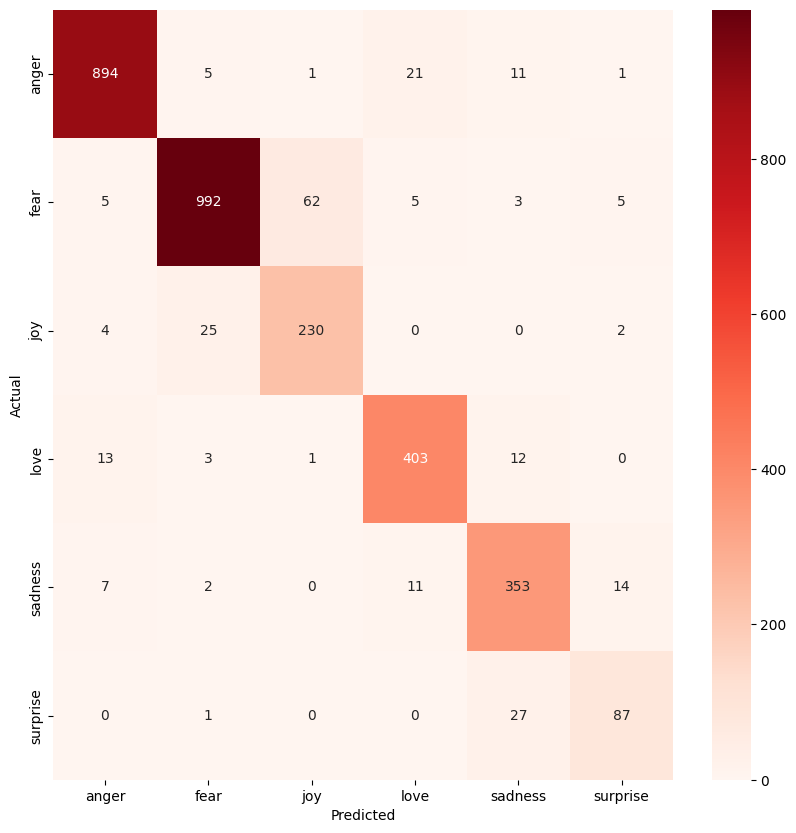

In [50]:
cm = confusion_matrix(y_true, y_preds)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [51]:
text = "I love to play football"

input_encoded = tokenizer(text, return_tensors='pt').to(device)

with torch.no_grad():
    output = model(**input_encoded)

logits = output.logits
pred = torch.argmax(logits, dim=-1).item()
pred, id2label[pred]

(1, 'joy')

In [52]:
def get_prediction(text):
    input_encoded = tokenizer(text, return_tensors='pt').to(device)

    with torch.no_grad():
        output = model(**input_encoded)
    logits = output.logits
    pred = torch.argmax(logits, dim=-1).item()
    return id2label[pred]

get_prediction(text)

'joy'

In [53]:
get_prediction("I hate to play football")

'anger'

In [54]:
trainer.save_model('bert_base_sentiment_model')

Saving model checkpoint to bert_base_sentiment_model
Configuration saved in bert_base_sentiment_model/config.json
Model weights saved in bert_base_sentiment_model/model.safetensors
tokenizer config file saved in bert_base_sentiment_model/tokenizer_config.json
Special tokens file saved in bert_base_sentiment_model/special_tokens_map.json


In [56]:
# Use pipeline

from transformers import pipeline

classifier = pipeline('text-classification', model='bert_base_sentiment_model')

classifier('I love to play football')

loading configuration file bert_base_sentiment_model/config.json
Model config BertConfig {
  "_name_or_path": "bert_base_sentiment_model",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.46.0",

[{'label': 'joy', 'score': 0.7363578081130981}]

In [58]:
classifier(["how are you?", "what's wrong with you?"])

[{'label': 'joy', 'score': 0.9261828064918518},
 {'label': 'anger', 'score': 0.9259527921676636}]

In [59]:
!pwd

/content
